In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fruits = pd.read_table("https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/8f7/d4e/571/fruits.txt")

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In this, we will predict Fruit labels based on mass , width, height and color score

In [4]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [5]:
X = fruits.iloc[:,[3,4,5,6]].values
Y=fruits.iloc[:,0].values#depenedednt variable i.e Fruit labels

In [6]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [7]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()#k=5 default
classifier.fit(X_train ,Y_train)

KNeighborsClassifier()

In [9]:
Y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,Y_pred))

[[3 0 1 0]
 [0 2 0 0]
 [0 0 2 1]
 [0 0 0 3]]


In [11]:
print("Accuracy is: ",accuracy_score(Y_test , Y_pred))

Accuracy is:  0.8333333333333334


In [12]:
error = []
accuracy= []

#calculating error for k values between 1 and 40

for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    accuracy.append(accuracy_score(Y_test , pred_i))
    

Text(0, 0.5, 'Mean Error')

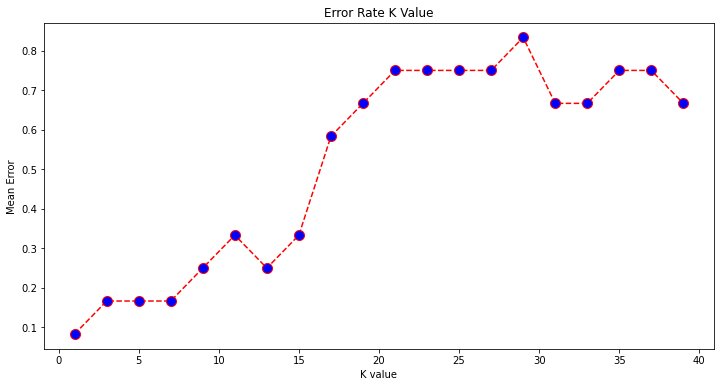

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

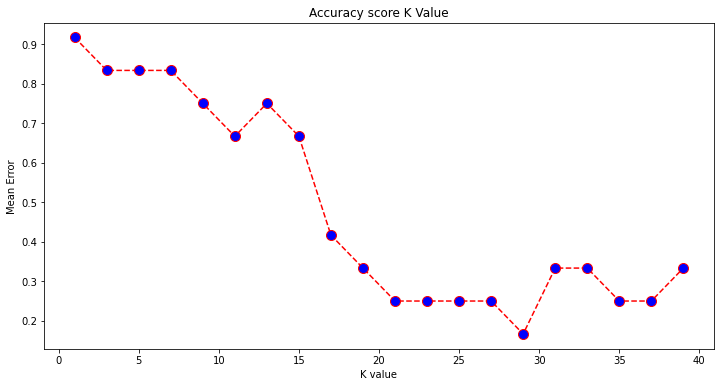

In [14]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Accuracy score K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In KNN, finding the value of k is not easy. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data Sccientists usually select k = sqrt(n)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7) #as n =59
classifier.fit(X_train ,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
Y_pred1 = classifier.predict(X_test)

In [17]:
print(confusion_matrix(Y_test,Y_pred1))


[[3 0 1 0]
 [0 2 0 0]
 [0 0 2 1]
 [0 0 0 3]]


In [18]:
print("Accuracy is: ",accuracy_score(Y_test , Y_pred1))
#now accuracy increases to 100%

Accuracy is:  0.8333333333333334
